<a href="https://www.kaggle.com/code/sahilr05/energy-consumption-xgboost?scriptVersionId=107150573" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import library

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [2]:
color_pal = sns.color_palette()
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
# Read one of data
data  = pd.read_csv("/kaggle/input/hourly-energy-consumption/PJME_hourly.csv")
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
data = data.set_index("Datetime") # set datetime column as index 

In [5]:
# convert date object type to datetime type

data.index =pd.to_datetime(data.index)

<AxesSubplot:title={'center':'PJME_hourly'}, xlabel='Datetime'>

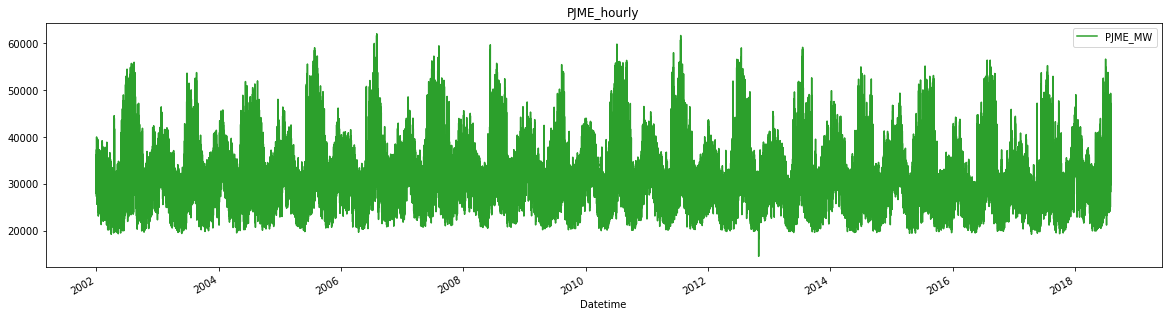

In [6]:
data.plot(figsize=(20,5),color=color_pal[2],title="PJME_hourly")

Split Data into train, test

In [7]:
train = data.iloc[data.index < "01-01-2015"]
test = data.iloc[data.index >= "01-01-2015"]

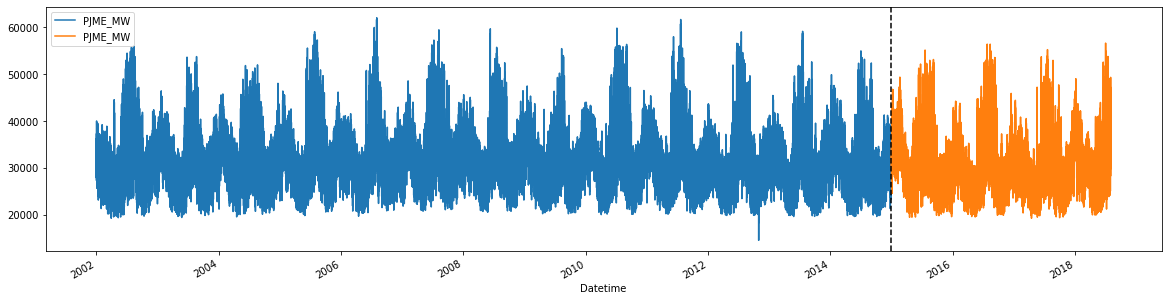

In [8]:
fig,ax = plt.subplots(figsize=(20,5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline("01-01-2015",color="black",ls='--')

<AxesSubplot:title={'center':'Week Data'}, xlabel='Datetime'>

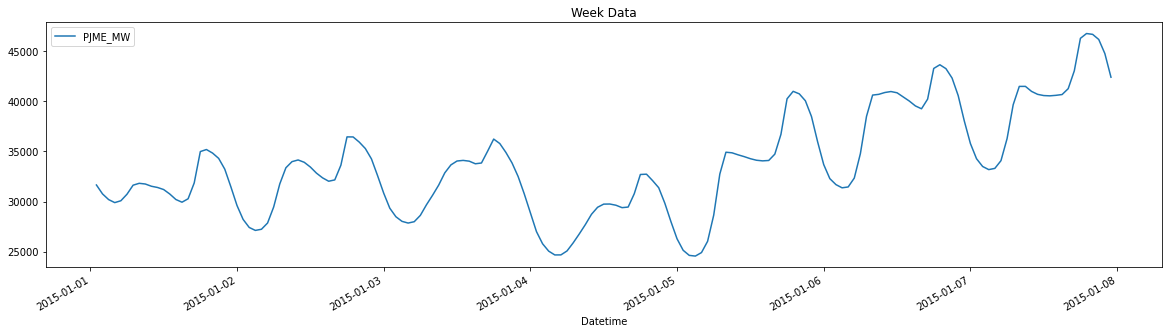

In [9]:
data.iloc[(data.index > "01-01-2015") &(data.index < "01-08-2015")].plot(figsize=(20,5),title="Week Data")

In [10]:
# Get inside from time data

def ceate_fet(data):
    data = data.copy()
    data["hour"] = data.index.hour
    data["dayofweek"] = data.index.dayofweek
    data["quarter"] = data.index.quarter
    data["month"] = data.index.month
    data["year"] = data.index.year
    data["dayofyear"] = data.index.dayofyear
    return data

In [11]:
data = ceate_fet(data)

Text(0.5, 1.0, 'Hourly use')

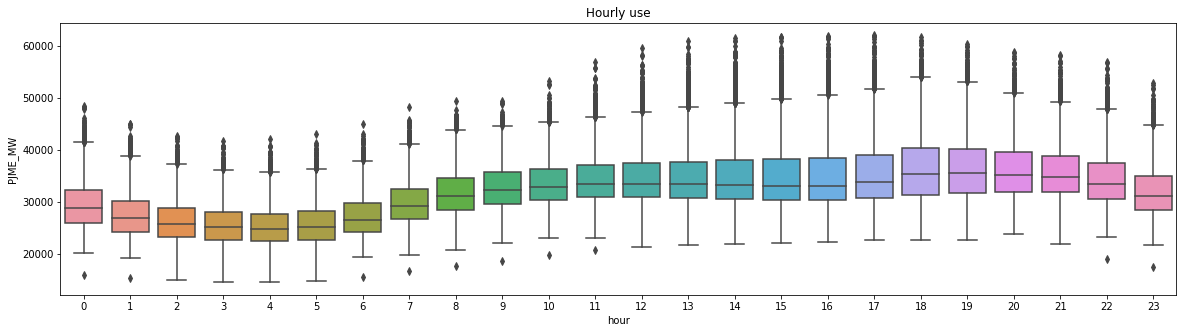

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x="hour",y="PJME_MW")
plt.title("Hourly use")

Text(0.5, 1.0, 'monthly use')

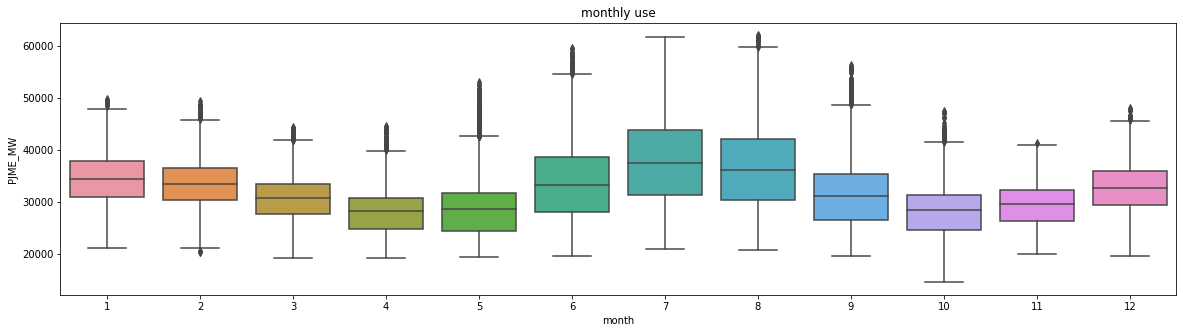

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x="month",y="PJME_MW")
plt.title("monthly use")

Create Model

In [14]:
train = ceate_fet(train)
test = ceate_fet(test)
x_train = train.drop(["PJME_MW"],axis=1)
y_train = train["PJME_MW"]

x_test = test.drop(["PJME_MW"],axis=1)
y_test = test["PJME_MW"]

In [15]:
model = xgb.XGBRegressor(n_estimators=500,early_stopping_round=50,learning_rate=0.01)
model.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],verbose=100)

[06:05:51] WARNING: ../src/learner.cc:627: 
Parameters: { "early_stopping_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.13873	validation_1-rmse:11517.66004
[200]	validation_0-rmse:5373.33346	validation_1-rmse:5165.30811
[300]	validation_0-rmse:3375.20923	validation_1-rmse:3829.25476
[400]	validation_0-rmse:2882.55200	validation_1-rmse:3715.04915
[499]	validation_0-rmse:2701.69108	validation_1-rmse:3756.58198


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_round=50, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [16]:
test["prediction"]  =model.predict(x_test)

In [17]:
df = data.merge(test[["prediction"]],how="left",left_index=True,right_index=True)

<AxesSubplot:xlabel='Datetime'>

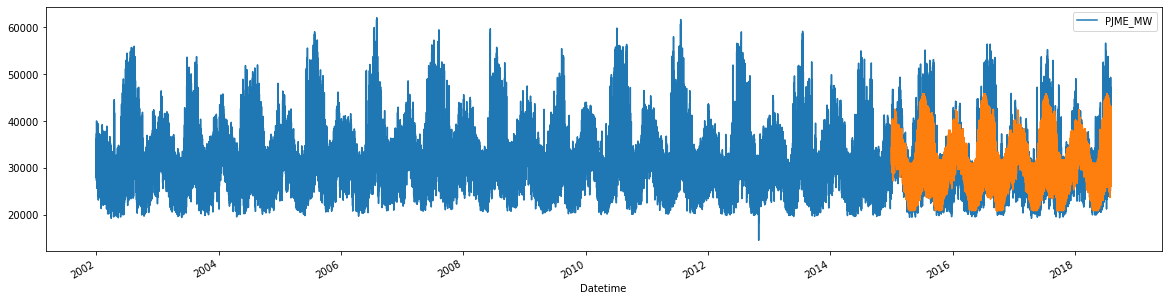

In [18]:
df[["PJME_MW"]].plot(figsize=(20,5))
df["prediction"].plot(figsize=(20,5))

In [19]:
np.sqrt(mean_squared_error(test["PJME_MW"],test["prediction"]))

3756.5819783523375

In [20]:
data.index.max()

Timestamp('2018-08-03 00:00:00')

In [21]:
future = pd.date_range("2018-08-03","2019-08-03",freq="1h")
future_df = pd.DataFrame(index=future)
future_df["isFuture"] =True
data["isFuture"] =False
df_future = pd.concat([data,future_df])

In [22]:
df= ceate_fet(df_future)
df_future = df.query("isFuture").copy()

In [23]:
df_future["prediction"] = model.predict(df_future.drop(["PJME_MW","isFuture"],axis=1))

<AxesSubplot:title={'center':'Future Prediction'}>

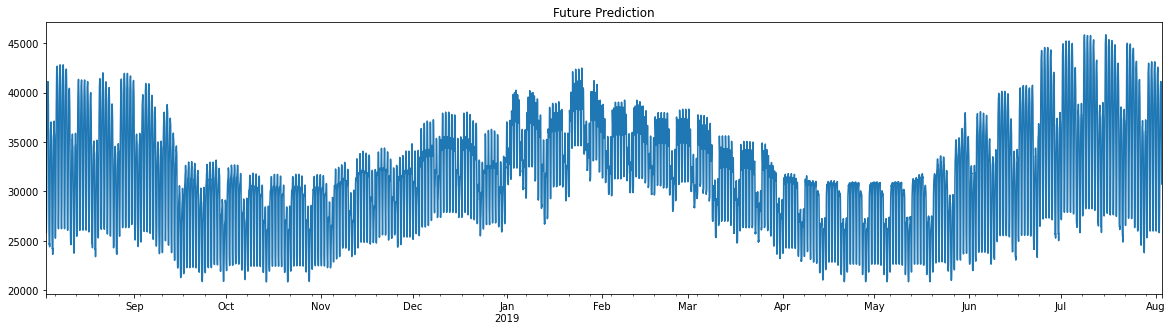

In [24]:
df_future["prediction"].plot(figsize=(20,5),title="Future Prediction")